In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import warnings

# Disable SettingWithCopyWarning
warnings.filterwarnings('ignore')

In [123]:
# IMPORT DATA SETS
# 'm' = monthly data
# 'w' = weekly data
df_consumption_m = pd.read_excel('NG_CONS.xls', sheet_name='Data 1', header=2)
df_production_m = pd.read_excel('NG_PROD.xls', sheet_name='Data 1', header=2)
df_storage_w = pd.read_excel('NG_STOR.xls', sheet_name='Data 1', header=2)
df_price_m = pd.read_excel('NG_PRI_FUT_S1.xls', sheet_name='Data 1', header=2)
df_import_m = pd.read_excel('NG_MOVE_IMP.xls', sheet_name='Data 1', header=2)
df_export_m = pd.read_excel('NG_MOVE_EXP.xls', sheet_name='Data 1', header=2)
df_exportprice_m = pd.read_excel('NG_MOVE_EXP.xls', sheet_name='Data 2', header=2)
df_gdp_m = pd.read_excel('US-Monthly-GDP-History-Data.xlsx', sheet_name= 'Data')




In [106]:
# ! Long processing time !

#https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm

# Import Commitment of traders data from 2006-2016
df_cot_2006_2015_w = pd.read_excel('F_DisAgg06_15.xls')

# Import data from 2016-2024 in individual excel sheets
df_cot_2016_w = pd.read_excel('COT_2016.xls')
df_cot_2017_w = pd.read_excel('COT_2017.xls')
df_cot_2018_w = pd.read_excel('COT_2018.xls')
df_cot_2019_w = pd.read_excel('COT_2019.xls')
df_cot_2020_w = pd.read_excel('COT_2020.xls')
df_cot_2021_w = pd.read_excel('COT_2021.xls')
df_cot_2022_w = pd.read_excel('COT_2022.xls')
df_cot_2023_w = pd.read_excel('COT_2023.xls')
df_cot_2024_w = pd.read_excel('COT_2024.xls')


In [124]:
# Join all COT data frames
df_cot_w = pd.concat([df_cot_2006_2015_w, df_cot_2016_w, df_cot_2017_w, df_cot_2018_w, df_cot_2019_w, df_cot_2020_w, df_cot_2021_w, df_cot_2022_w, df_cot_2023_w ,df_cot_2024_w])
# Select only Henry Hub nat gas data
df_cot_w = df_cot_w.loc[df_cot_w['Market_and_Exchange_Names'] == 'HENRY HUB LAST DAY FIN - NEW YORK MERCANTILE EXCHANGE']

In [125]:
#https://www.eia.gov/naturalgas/data.php

# Convert weekly storage to monthly
df_storage_w['Month'] = df_storage_w['Date'].dt.month
df_storage_w['Year'] = df_storage_w['Date'].dt.year
df_storage_m = df_storage_w.groupby(['Year', 'Month']).mean()

# Convert weekly COT to monthly
df_cot_w['Month'] = df_cot_w['Report_Date_as_MM_DD_YYYY'].dt.month
df_cot_w['Year'] = df_cot_w['Report_Date_as_MM_DD_YYYY'].dt.year
df_cot_m = df_cot_w.groupby(['Year', 'Month']).mean()

# Separate month and year from date in the rest of the dataframes to allow easy merging
df_consumption_m['Month'] = df_consumption_m['Date'].dt.month
df_consumption_m['Year'] = df_consumption_m['Date'].dt.year
df_consumption_m = df_consumption_m.groupby(['Year', 'Month']).mean()

df_production_m['Month'] = df_production_m['Date'].dt.month
df_production_m['Year'] = df_production_m['Date'].dt.year
df_production_m = df_production_m.groupby(['Year', 'Month']).mean()

df_price_m['Month'] = df_price_m['Date'].dt.month
df_price_m['Year'] = df_price_m['Date'].dt.year
df_price_m = df_price_m.groupby(['Year', 'Month']).mean()

df_import_m['Month'] = df_import_m['Date'].dt.month
df_import_m['Year'] = df_import_m['Date'].dt.year
df_import_m = df_import_m.groupby(['Year', 'Month']).mean()

df_export_m['Month'] = df_export_m['Date'].dt.month
df_export_m['Year'] = df_export_m['Date'].dt.year
df_export_m = df_export_m.groupby(['Year', 'Month']).mean()

df_exportprice_m['Month'] = df_exportprice_m['Date'].dt.month
df_exportprice_m['Year'] = df_exportprice_m['Date'].dt.year
df_exportprice_m = df_exportprice_m.groupby(['Year', 'Month']).mean()

#https://www.spglobal.com/marketintelligence/en/mi/products/us-monthly-gdp-index.html
df_gdp_m['Month'] = df_gdp_m['Date'].dt.month
df_gdp_m['Year'] = df_gdp_m['Date'].dt.year
df_gdp_m = df_gdp_m.groupby(['Year', 'Month']).mean()

In [126]:
# Merge all data frames on Month and Year
df_full = df_cot_m.merge(df_production_m, on=['Month', 'Year']).merge(df_storage_m, on=['Month', 'Year']).merge(df_consumption_m, on=['Month', 'Year']).merge(df_price_m, on=['Month', 'Year']).merge(df_import_m, on=['Month', 'Year']).merge(df_export_m, on=['Month', 'Year']).merge(df_exportprice_m, on=['Month', 'Year']).merge(df_gdp_m, on=['Month', 'Year'])

# Create new data frame of only desired columns from full data frame
df = df_full[['U.S. Natural Gas Imports (MMcf)', 'U.S. Natural Gas Exports (MMcf)', 'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)', 'U.S. Natural Gas Marketed Production (MMcf)', 'U.S. Natural Gas Total Consumption (MMcf)', 'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)', 'Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL', 'Price of U.S. Natural Gas Exports (Dollars per Thousand Cubic Feet)', 'Monthly Real GDP Index']]
#Add date column to data frame
df['Date'] = [dt.datetime(year, month, 1) for month, year in df['U.S. Natural Gas Imports (MMcf)'].index]

# Calculate net imports, actual storage change and estimated storage change based on values in data frame
df['Net_Imports_MMcf'] = df['U.S. Natural Gas Imports (MMcf)'] - df['U.S. Natural Gas Exports (MMcf)']
df['Storage_Change_MMcf'] = (df['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'].diff())*1000
df['Estimated_Storage_Change_MMcf'] = df['Net_Imports_MMcf'] + df['U.S. Natural Gas Marketed Production (MMcf)'] - df['U.S. Natural Gas Total Consumption (MMcf)']

In [127]:
#Retrieve Temperature Data
from meteostat import Point, Daily
#Set start and end date for temperature data
start = dt.datetime(2011, 11, 1)
end = dt.datetime(2024, 1, 1)

# Create Point for Cities
newyork = Point(40.7143, -74.006)
chicago = Point(41.85, -87.65)
orlando = Point(28.5383, -81.3792)
denver = Point(39.7392, -104.9847)
oklahomacity = Point(35.4676, -97.5164)
knoxville = Point(35.9606, -83.9207)
losangeles = Point(34.0522, -118.2437)
seattle = Point(47.6062, -122.3321)
lasvegas = Point(36.175, -115.1372)
houston = Point(29.7633, -95.3633)

tempdf = pd.DataFrame()
# Get monthly data since 2011 and add to tempdf data frame
tempdf['new_york_t'] = Daily(newyork, start, end).fetch()['tavg']
tempdf['chicago_t'] = Daily(chicago, start, end).fetch()['tavg']
tempdf['orlando_t'] = Daily(orlando, start, end).fetch()['tavg']
tempdf['denver_t'] = Daily(denver, start, end).fetch()['tavg']
tempdf['oklahoma_city_t'] = Daily(oklahomacity, start, end).fetch()['tavg']
tempdf['knoxville_t'] = Daily(knoxville, start, end).fetch()['tavg']
tempdf['los_angeles_t'] = Daily(losangeles, start, end).fetch()['tavg']
tempdf['seattle_t'] = Daily(seattle, start, end).fetch()['tavg']
tempdf['las_vegas_t'] = Daily(lasvegas, start, end).fetch()['tavg']
tempdf['houston_t'] = Daily(houston, start, end).fetch()['tavg']


# Seperate month and year from date value for easy manipulation
tempdf['Month'] = tempdf.index.month
tempdf['Year'] = tempdf.index.year

In [128]:
# Heating degree day function (HDD)
def hdd(x):
    hdd = (18 - x)
    if hdd < 0:
        hdd = 0
    return hdd
# Cooling degree day function (CDD)
def cdd(x):
    cdd = (x - 18)
    if cdd < 0:
        cdd = 0
    return cdd

# Apply functions to get daily HDD and CDD dataframes (excluding applying function to month and year)
daily_hdd = tempdf.iloc[:, :-2].applymap(hdd)
daily_cdd = tempdf.iloc[:, :-2].applymap(cdd)

# Add back month and year values to allow grouping by year and month
daily_hdd[['Month', 'Year']] = tempdf[['Month', 'Year']]
daily_cdd[['Month', 'Year']] = tempdf[['Month', 'Year']]

# Calculate monthly sums of EDD and CDD 
monthly_hdd = daily_hdd.groupby(['Year', 'Month']).sum()
monthly_cdd = daily_cdd.groupby(['Year', 'Month']).sum()

# Rename columns appropiately adding _hdd and _cdd to allow for merging
monthly_hdd.columns = [col + '_hdd' for col in monthly_hdd.columns]
monthly_cdd.columns = [col + '_cdd' for col in monthly_cdd.columns]

# Merge two data frames into joint energy degree day data frame
edd_m = monthly_cdd.merge(monthly_hdd, on=['Year', 'Month'])

# Finally merge to dataframe containg rest of data
df = df.merge(edd_m, on=['Year', 'Month'])

In [129]:
# Retrieve US Population data set
#https://fred.stlouisfed.org/series/POPTHM
df_population_m = pd.read_excel('US_POP.xls', header=10)
# Seperate month and year from date value for easy manipulation
df_population_m['Month'] = df_population_m['observation_date'].dt.month
df_population_m['Year'] = df_population_m['observation_date'].dt.year
# Drop date to avoid unnecessary merging
df_population_m = df_population_m.drop(columns=['observation_date'])
df = df.merge(df_population_m, on=['Year', 'Month'])

In [130]:
#Send all data to CSV
df.to_csv('clean_dataset.csv')

# Summary

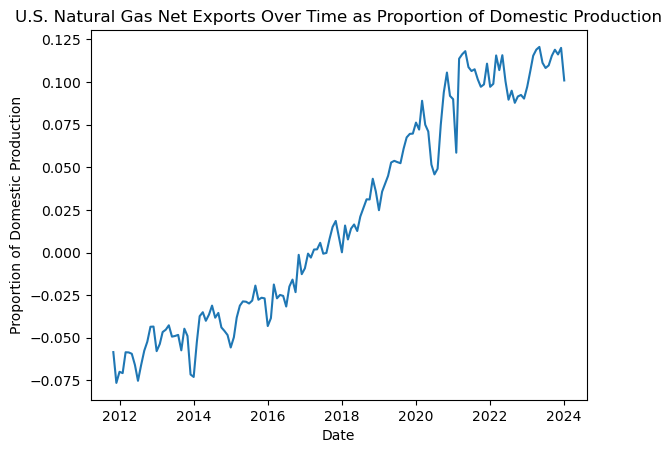

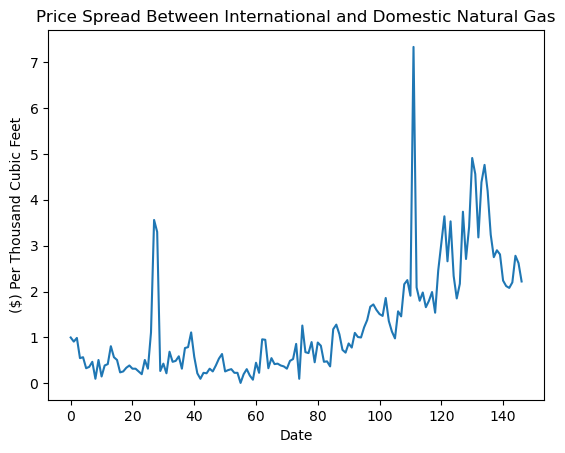

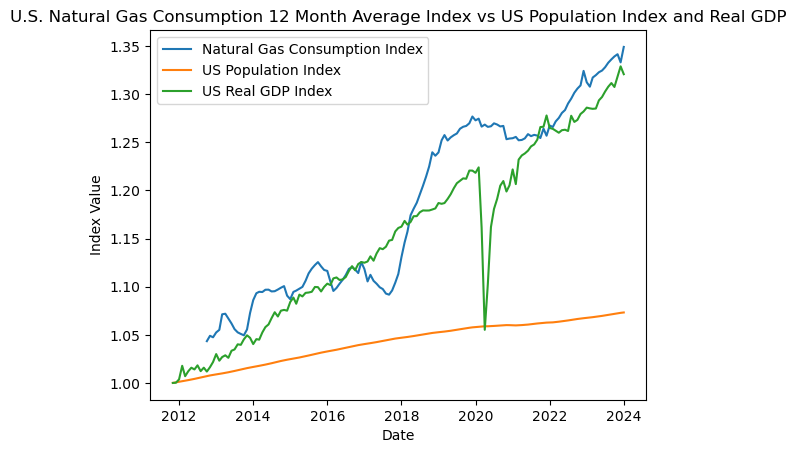

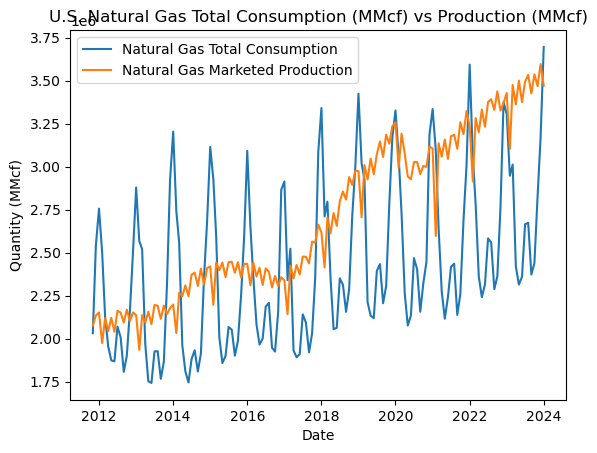

In [134]:

#Net exports as % of domestic production
plt.plot(df['Date'], (df['U.S. Natural Gas Exports (MMcf)'].values - df['U.S. Natural Gas Imports (MMcf)'].values)/df['U.S. Natural Gas Marketed Production (MMcf)'].values)
plt.xlabel('Date')
plt.ylabel('Proportion of Domestic Production')
plt.title('U.S. Natural Gas Net Exports Over Time as Proportion of Domestic Production')
plt.show()

#Spread between international and domestic price
plt.plot(df['Price of U.S. Natural Gas Exports (Dollars per Thousand Cubic Feet)'] - df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])
plt.xlabel('Date')
plt.ylabel('($) Per Thousand Cubic Feet')
plt.title('Price Spread Between International and Domestic Natural Gas')
plt.show()

#12 month average consumption index vs population index
plt.plot(df['Date'], (df['U.S. Natural Gas Total Consumption (MMcf)'].rolling(window=12).mean())/df['U.S. Natural Gas Total Consumption (MMcf)'][0], label = 'Natural Gas Consumption Index')
plt.plot(df['Date'], (df['POPTHM'])/df['POPTHM'][0], label = 'US Population Index')
plt.plot(df['Date'], (df['Monthly Real GDP Index'])/df['Monthly Real GDP Index'][0], label = 'US Real GDP Index')

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('U.S. Natural Gas Consumption 12 Month Average Index vs US Population Index and Real GDP')
plt.legend()
plt.show()

#Production vs consumption
plt.plot(df['Date'], df['U.S. Natural Gas Total Consumption (MMcf)'], label = 'Natural Gas Total Consumption')
plt.plot(df['Date'], df['U.S. Natural Gas Marketed Production (MMcf)'], label = 'Natural Gas Marketed Production')
plt.xlabel('Date')
plt.ylabel('Quantity (MMcf)')
plt.title('U.S. Natural Gas Total Consumption (MMcf) vs Production (MMcf)')
plt.legend()
plt.show()

# Storage

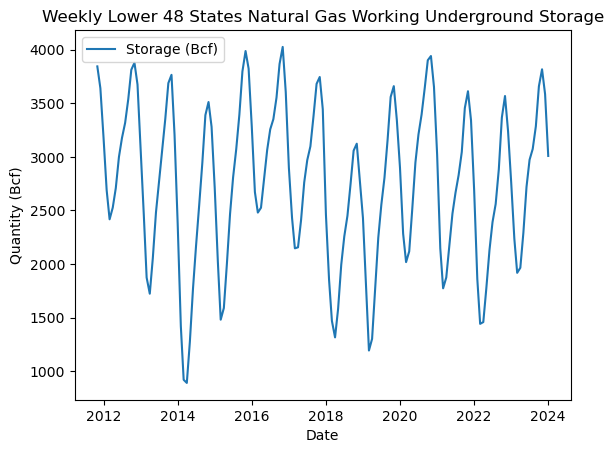

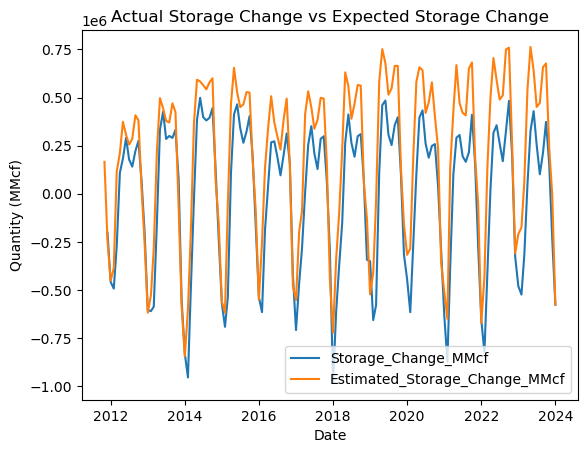

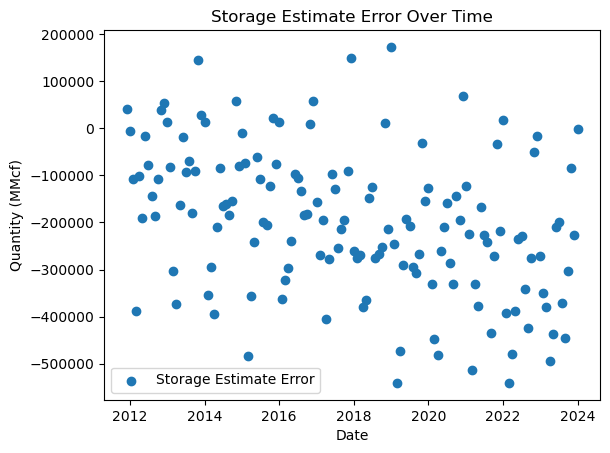

In [138]:
# Regress predicted storage on actual storage and check that error term is mean zero homoskedastic
# Or just plot the difference between the two and check its mean zero homoskedastic
#Production vs consumption
plt.plot(df['Date'], df['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'], label = 'Storage (Bcf)')
plt.xlabel('Date')
plt.ylabel('Quantity (Bcf)')
plt.title('Weekly Lower 48 States Natural Gas Working Underground Storage')
plt.legend()
plt.show()

plt.plot(df['Date'], df['Storage_Change_MMcf'], label = 'Storage_Change_MMcf')
plt.plot(df['Date'], df['Estimated_Storage_Change_MMcf'], label = 'Estimated_Storage_Change_MMcf')
plt.xlabel('Date')
plt.ylabel('Quantity (MMcf)')
plt.title('Actual Storage Change vs Expected Storage Change')
plt.legend()
plt.show()

plt.scatter(df['Date'], df['Storage_Change_MMcf'] - df['Estimated_Storage_Change_MMcf'], label = 'Storage Estimate Error')
plt.xlabel('Date')
plt.ylabel('Quantity (MMcf)')
plt.title('Storage Estimate Error Over Time')
plt.legend()
plt.show()

# Temperature

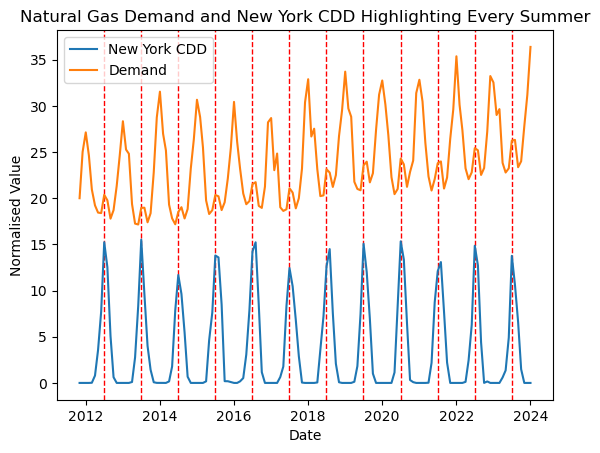

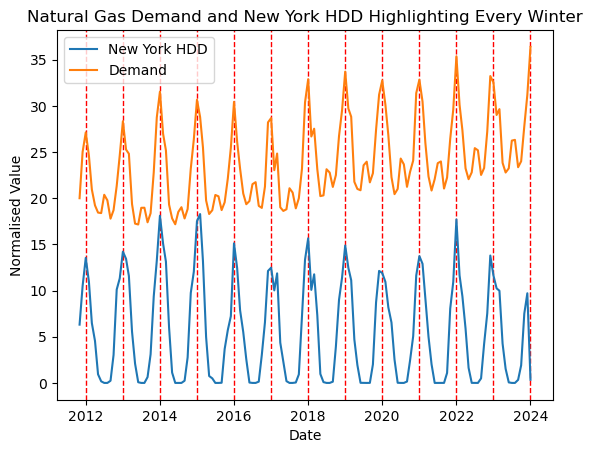

In [226]:
# Regress price on the temperature of all these places can we infer which place has largest population (consumes most) by the significance of its coefficent 
# Regress temp on storage and price
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add vertical lines every 6 months
for date in pd.date_range(start='2012-06-01', end='2024-01-01', freq='12M'):
    plt.axvline(x=date, color='r', linestyle='--', linewidth=1)

plt.plot(df['Date'], monthly_cdd['new_york_t_cdd'].values/18, label='New York CDD')
plt.plot(df['Date'], df['U.S. Natural Gas Total Consumption (MMcf)']*20/df['U.S. Natural Gas Total Consumption (MMcf)'][0], label='Demand')
plt.xlabel('Date')
plt.ylabel('Normalised Value')
plt.title('Natural Gas Demand and New York CDD Highlighting Every Summer')
plt.legend()
plt.show()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add vertical lines every 6 months
for date in pd.date_range(start='2011-12-01', end='2024-01-01', freq='12M'):
    plt.axvline(x=date, color='r', linestyle='--', linewidth=1)

plt.plot(df['Date'],monthly_hdd['new_york_t_hdd'].values/35, label='New York HDD')
plt.plot(df['Date'], df['U.S. Natural Gas Total Consumption (MMcf)']*20/df['U.S. Natural Gas Total Consumption (MMcf)'][0], label='Demand')
plt.xlabel('Date')
plt.ylabel('Normalised Value')
plt.title('Natural Gas Demand and New York HDD Highlighting Every Winter')
plt.legend()
plt.show()

# COT

In [ ]:
# Regress price on net COT positions, what is the relationship, what is the inference

# Full Model

In [ ]:
# Finally how accurately can we predict OUT OF SAMPLE price with EDD, HDD, NET PRODUCER COT (natural log) 
# + ~[storage, production, consumption, export, import]

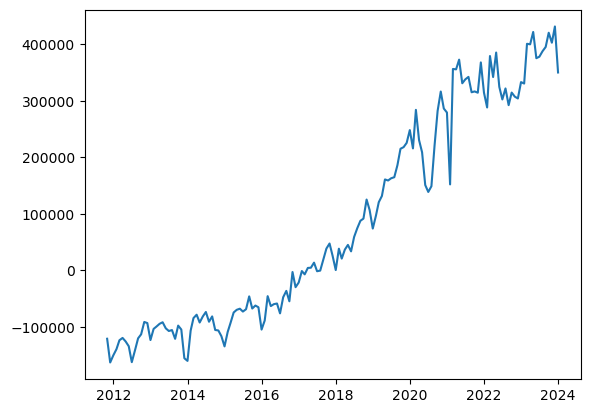

In [251]:
plt.plot(df['Date'], df['U.S. Natural Gas Marketed Production (MMcf)'])
plt.plot(df['Date'], df['U.S. Natural Gas Total Consumption (MMcf)'])


plt.plot(df['Date'], df['U.S. Natural Gas Marketed Production (MMcf)'].values - df['U.S. Natural Gas Total Consumption (MMcf)'].values + df['U.S. Natural Gas Exports (MMcf)'].values - df['U.S. Natural Gas Imports (MMcf)'].values)
plt.plot(df['Date'], df['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)']*1000)
#1000 MMcf = 1 Billion Cubic Feet

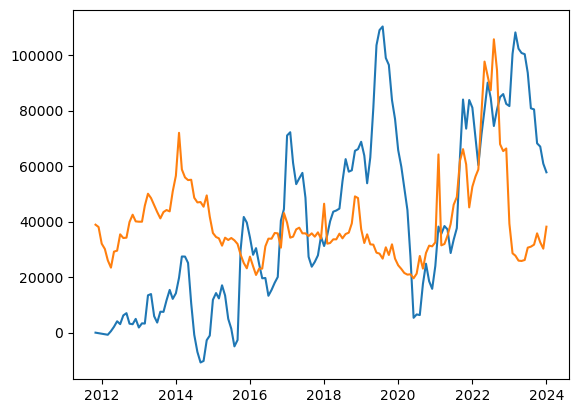

In [250]:
plt.plot(df['Date'], df['Prod_Merc_Positions_Long_ALL'].values - df['Prod_Merc_Positions_Short_ALL'].values)
plt.plot(df['Date'], df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].values*12000)
